## Тема проекта
- Зависимость стоимости мобильных телефонов от разных характеристик и нахождение других зависимостей
## Какие данные вы взяли для работы, укажите их источник
- Я взял набор данных, который описывает характеристики мобильных устройств и их ценовую категорию
[Источник](https://www.kaggle.com/datasets/atefehmirnaseri/cell-phone-price?select=CellPhone_train.csv)
## Описание каждого признака:
1. _battery_power_: Общий заряд батареи, который можно сохранить (мАч)
2. _blue_: устройство оснащено функцией blutooth или нет, да/нет (1/0)
3. _clock_speed_: скорость выполнения инструкций микропроцессором
4. _dual_sim_: устройство имеет две SIM-карты одновременно или нет
5. _fc_: качество изображения фронтальной камеры в мегапикселях
6. _four_g_: устройство имеет сеть 4G или нет
7. _int_memory_: объем встроенной памяти в гигабайтах
8. _m_dep_: глубина устройства в сантиметрах
9. _mobile_wt_: вес устройства
10. _n_cores_: количество процессорных ядер
11. _pc_: качество основной камеры в мегапикселях
12. _px_height_: высота разрешения в пикселях, 
13. _px_width_: ширина разрешения в пикселях
14. _ram_: оперативная память в мегабайтах
15. _sc_h_: высота экрана устройства в сантиметрах
16. _sc_w_: ширина экрана устройства в сантиметрах
17. _talk_time_: максимальное время разговора, которое может поддерживать полностью заряженный аккумулятор устройства
18. _three_g_: устройство имеет Сеть 3G или нет
19. _touch_screen_: устройство имеет сенсорный экран или нет
20. _wifi_: устройство имеет Wi-Fi или нет
21. _price_range_: цена устройства по категориям

In [1]:
# Подключаем все использованные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Подготовка Pandas для вывода и загрузка датасэта
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 320)
df = pd.read_csv("CellPhone_train.csv")

## EDA. Разведочный анализ данных

In [3]:
# EDA. Сколько столбцов и строк в столбце?
rows, columns = df.shape
print(f'В датасэте {rows} строк и {columns} столбец.')

В датасэте 2000 строк и 21 столбец.


In [4]:
# EDA. Узнайте тип данных каждого признака
data_types = df.dtypes
print("Тип данных для каждого признака:\n", data_types)

Тип данных для каждого признака:
 battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


## EDA. Определите тип данных для каждого объекта с точки зрения анализа
- _Непрерывный_: clock_speed, m_dep;
- _Дискретный_: battery_power, fc, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time;
- _Номинальный_: blue, dual_sim, four_g, three_g, touch_screen, wifi;
- _Порядковый_: price_range;

In [5]:
# EDA. Есть ли в данных выбросы?
missing_data = df.isnull().sum()
print("Выбросы в каждой из колонок:\n", missing_data)

# Обработка данных
# Для каждого числового столбца заполняем выбросы медианой.
numeric_columns = ['clock_speed', 'm_dep', 'battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for column in numeric_columns:
    if df[column].isnull().sum() != 0:
        df[column].fillna(df[column].median(), inplace=True)
# Для каждого категориального столбца заполняем пропуски модой.
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
for column in categorical_columns:
    if df[column].isnull().sum() != 0:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Проверяем на отсутствие пропусков
missing_data_after = df.isnull().sum()
print("Данные после обработки пропусков:\n", missing_data_after)

Выбросы в каждой из колонок:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Данные после обработки пропусков:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


## Обоснование выбранных методов заполнения пропусков
Выбор метода обработки пропусков в данных зависит от типа данных в каждом столбце.
- __Числовые столбцы__: Для числовых столбцов я предпочитаю использовать медиану для заполнения пропусков. Это объясняется тем, что медиана менее подвержена влиянию выбросов и искажений данных по сравнению со средним значением. Если в наборе данных присутствуют экстремально высокие или низкие значения, они могут значительно исказить среднее значение, в то время как медиана останется стабильной. Именно поэтому заполнение пропусков медианой часто приводит к более точным результатам.
- __Категориальные столбцы__: Для категориальных столбцов я выбираю моду для заполнения пропусков. В этих столбцах отсутствует "среднее" значение, как в числовых. Применение моды является простым и часто эффективным методом заполнения пропусков в категориальных данных, так как она представляет собой наиболее часто встречающееся значение.

In [6]:
# EDA. Посчитайте описательные статистики по переменным

def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]


# Выводим выбросы
for column in numeric_columns:
    print(f'Пропуски в {column}:\n', get_outliers(df, column))

# Удаляем выбросы
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR))]

Пропуски в clock_speed:
 Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Пропуски в m_dep:
 Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Пропуски в battery_power:
 Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]
Пропуски в fc:
       battery_power  blue  clock_speed  dual_sim  ...  three_g  touch_screen  wifi  price_range
95             1137     1          1.0         0  ...        1        

## С помощью каких критериев я определяю выбросы?

Я применяю метод межквартильного размаха (IQR). Это широко используемый статистический подход для определения аномалий путем расчета IQR. IQR представляет собой диапазон, который охватывает значения между первым и третьим квартилями данных. Первый квартиль - значение, ниже которого располагаются 25% всех данных. Третий квартиль - значение, ниже которого располагаются 75% всех данных. Иными словами, IQR охватывает центральные 50% данных.

In [7]:
# EDA. Посчитайте описательные статистики по переменным
descriptive_stats = df.describe()
print("Описательная статистика:\n", descriptive_stats)

Описательная статистика:
        battery_power         blue  clock_speed     dual_sim  ...      three_g  touch_screen         wifi  price_range
count    1980.000000  1980.000000  1980.000000  1980.000000  ...  1980.000000   1980.000000  1980.000000  1980.000000
mean     1236.402020     0.494444     1.521162     0.509091  ...     0.760606      0.501515     0.505051     1.497980
std       439.568762     0.500095     0.817236     0.500044  ...     0.426821      0.500124     0.500101     1.117863
min       501.000000     0.000000     0.500000     0.000000  ...     0.000000      0.000000     0.000000     0.000000
25%       849.500000     0.000000     0.700000     0.000000  ...     1.000000      0.000000     0.000000     0.000000
50%      1224.000000     0.000000     1.500000     1.000000  ...     1.000000      1.000000     1.000000     1.000000
75%      1614.000000     1.000000     2.200000     1.000000  ...     1.000000      1.000000     1.000000     2.000000
max      1998.000000     1.000

In [8]:
# EDA. Интерпретируйте описательные статистики для одного числового признака и для одного категориального
# Числовой признак: int_memory
print("Описательные статистика для свойства 'int_memory':\n", descriptive_stats['int_memory'])

# Категориальный признак: price_range
type_counts = df['price_range'].value_counts()
print("Описательные статистика для свойства 'price_range':\n", type_counts)

Описательные статистика для свойства 'int_memory':
 count    1980.000000
mean       32.055051
std        18.126820
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64
Описательные статистика для свойства 'price_range':
 price_range
2    496
0    496
1    495
3    493
Name: count, dtype: int64


## Визуализация. Постройте не менее трех графиков (причем, нужно использовать как минимум два типа визуализаций)

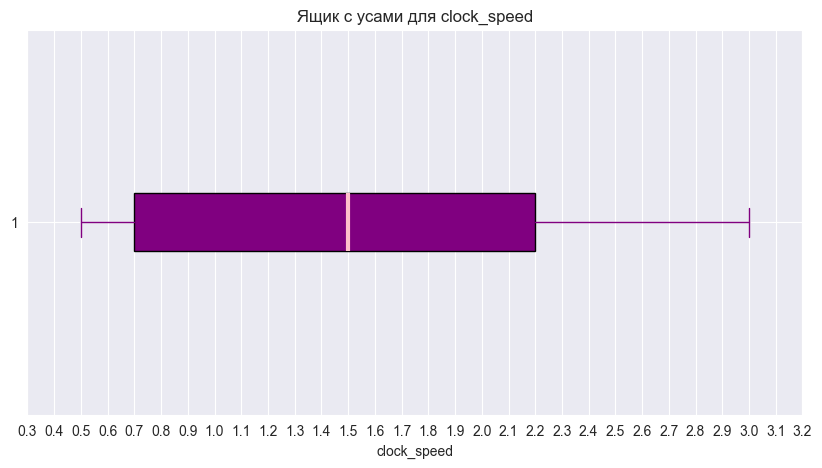

In [9]:
# Визуализация 1. График ящик с усами для свойства 'clock_speed'
# Строим график ящика с усами
plt.figure(figsize=(10, 5))
bp = plt.boxplot(df['clock_speed'], vert=False, patch_artist=True, medianprops={'linewidth': 3})

# Задание цветов для ящика и усов
bp['boxes'][0].set(facecolor='purple')
bp['whiskers'][0].set(color='purple')
bp['whiskers'][1].set(color='purple')
bp['caps'][0].set(color='purple')
bp['caps'][1].set(color='purple')
bp['medians'][0].set(color='pink')

# Подписываем график и ось ох
plt.title('Ящик с усами для clock_speed')
plt.xlabel('clock_speed')

# Регулируем отметки (сетку), их шаг (0.1), крайнюю левую и правую границы
plt.xticks(np.arange(min(df['clock_speed']) - 0.2, max(df['clock_speed']) + 0.2, 0.1))

# Выводим график
plt.grid(True)
plt.show()

## Вывод по визуализации 1
Видим, что медиана рейтинга выпадает на 1.5, половина данных попадает в промежуток рейтинга от 0.7 до 2.2, предполагаемый максимум по данной диаграмме 2.2, предполагаемый минимум 0.7

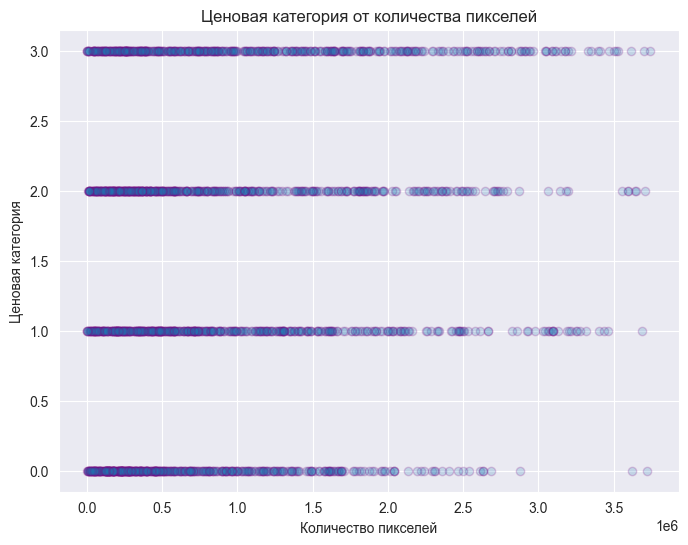

In [10]:
# Визуализация 2. График разброса 'price_range' от 'total_resolution'
# Создаём новое свойство - 'total_resolution', которое будет равно произведению количества пикселей по ширине и длине
df['total_resolution'] = df['px_height'] * df['px_width']

# Строим график разброса (scatter)
plt.figure(figsize=(8, 6))
plt.scatter(df['total_resolution'], df['price_range'], alpha=0.2, edgecolor='purple')

# Подписываем график и оси
plt.xlabel('Количество пикселей')
plt.ylabel('Ценовая категория')
plt.title('Ценовая категория от количества пикселей')

# Выводим график
plt.grid(True)
plt.show()

## Вывод по визуализации 2
По данной диаграмме мы видим, что с ростом ценовой категории постепенно растёт и разрешение устройства

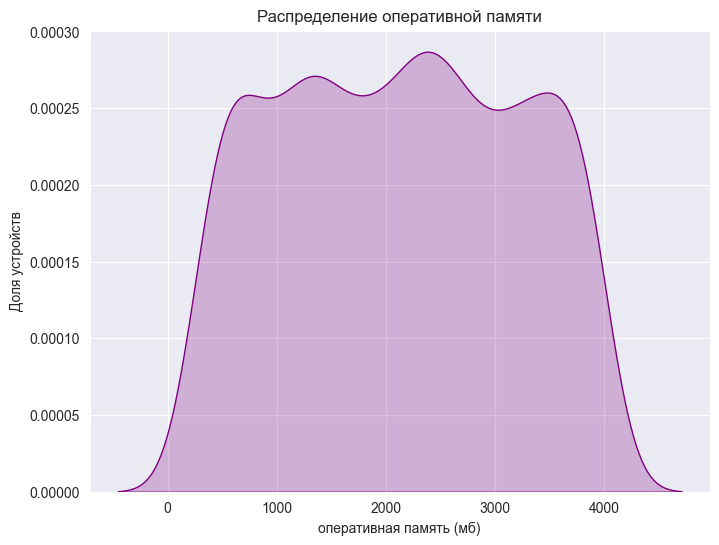

In [11]:
# Визуализация 3. График распределения оперативной памяти ('ram') по доле устройств.
# Строим график распределения
plt.figure(figsize=(8, 6))
sns.kdeplot(df['ram'], fill=True, color='purple', label='RAM Distribution')

# Подписываем график и оси
plt.title('Распределение оперативной памяти')
plt.xlabel('оперативная память (мб)')
plt.ylabel('Доля устройств')

# Выводим график
plt.grid(True)
plt.show()

## Вывод по визуализации 3
По этому графику мы видим распределение объема оперативной памяти по доле устройств с таким объемом. В среднем устройства обладают объемом от 500 мб до 3500, самый часто встречаемый объем ~2400 мб

## Корреляция.
Постройте матрицу корреляций по количественным переменным и опишите зависимости, которые обнаружили 

Correlation matrix:
                clock_speed     m_dep  battery_power        fc  ...       ram      sc_h      sc_w  talk_time
clock_speed       1.000000 -0.011400       0.010136 -0.006342  ...  0.004628 -0.026876 -0.005777  -0.010122
m_dep            -0.011400  1.000000       0.034834  0.004310  ... -0.011402 -0.027314 -0.019880   0.015418
battery_power     0.010136  0.034834       1.000000  0.020317  ... -0.000121 -0.023784 -0.016533   0.047909
fc               -0.006342  0.004310       0.020317  1.000000  ...  0.019440  0.000372 -0.001778  -0.008136
int_memory        0.004461  0.006426      -0.008197 -0.025745  ...  0.033712  0.039791  0.012055  -0.010334
mobile_wt         0.011939  0.018595       0.002575  0.014011  ... -0.004555 -0.032044 -0.019790   0.010434
n_cores          -0.005638 -0.003834      -0.026451 -0.001971  ...  0.008277 -0.002913  0.024048   0.015609
pc               -0.009017  0.030108       0.025013  0.635564  ...  0.031317  0.011671 -0.017581   0.015342
px_heig

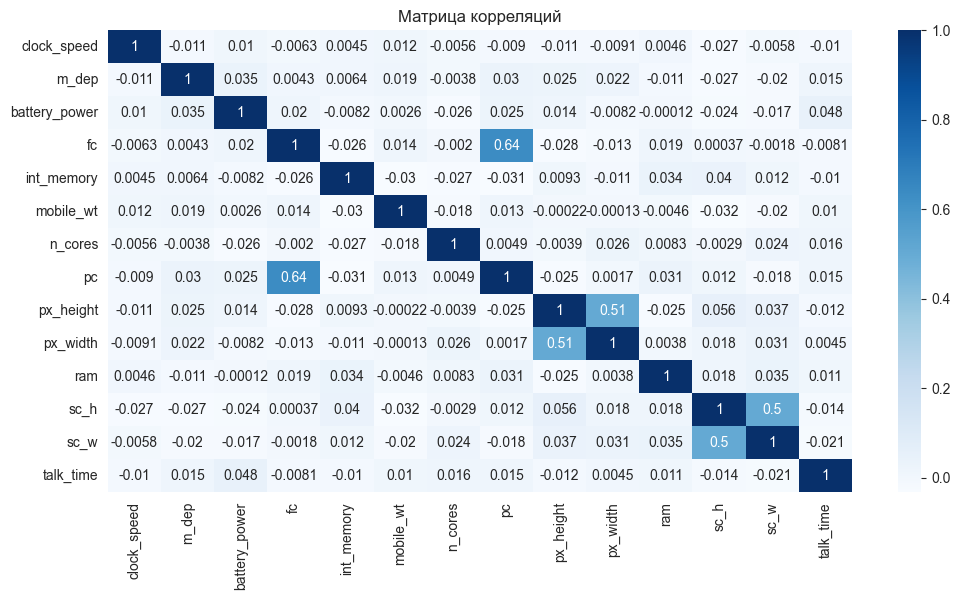

In [12]:
# Корреляция. Постройте матрицу корреляции для количественных переменных.
# Построение матрицы корреляций
correlation_matrix = df[numeric_columns].corr()
print("Correlation matrix:\n", correlation_matrix)

# Визуализация корреляций в виде таблицы
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

# Подписывание таблицы и вывод
plt.title('Матрица корреляций')
plt.show()

## Корреляция. Опишите зависимости, которые обнаружили
- _Средняя положительная_ между признаками _fc_ (качество изображения фронтальной камеры в мегапикселях) и _pc_ (качество основной камеры в мегапикселях). Значит, качество фронтальной камеры зачастую зависит от качества основной камеры.
- _Средняя положительная_ между признаками _px_height_ и _px_width_. Это логично, потому что самое распространённое разрешение экрана - 4x3 или 16x9, а разрешения указывают на отношение количества пикселей по длине к количеству пикселей по ширине.
- _Средняя положительная_ между признаками _sc_h_ и _sc_w_. Эта корреляция следует из прошлой, потому что все пиксели квадратные, значит отношение пикселей по сторонам будет такое же, как отношению длин сторон в сантиметрах

## Гипотезы. Тестирование гипотез
Реализуйте 3 из предложенных 5 гипотез на выбор

In [13]:
# Гипотеза 1. Среднее значение "sc_w" - 5.9. z-тест

print(f'Гипотеза: Среднее значение sc_w (длины по ширине) = 7.5, для проверки используем z-тест')
alpha = 0.05
mean_score = df['sc_w'].mean()  # считаем среднее значение
std_score = df['sc_w'].std()  # считаем стандартное отклонение столбца 'sc_w'
n = len(df['sc_w'])  # количество строк столбце 'sc_w'
z_score = (mean_score - 5.9) / (std_score / np.sqrt(n))  # считаем z-значение
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # two-tailed тест
if p_value < alpha:
    print(f'Гипотеза не верна: z_score = {z_score}, p_value = {p_value}')
else:
    print(f'Гипотеза верна: z_score = {z_score}, p_value = {p_value}')

Гипотеза: Среднее значение sc_w (длины по ширине) = 7.5, для проверки используем z-тест
Гипотеза верна: z_score = -1.2891800943422986, p_value = 0.19733548359694808


#### Гипотеза оказалась верной, p_value достаточно высокое, поэтому делаем вывод о том, что средняя длина телефонов по ширине в сантиметрах близка к значению 5.9

In [14]:
# Гипотеза 2. Максимальное время разговора по телефонам из высшей ценовой категории отличается от среднего максимального времени разговора по телефонам из всех категорий. t-тест

print(f'Гипотеза: максимальное время разговора по телефонам из высшей ценовой категории отличается от среднего максимального '
      f'времени разговора по телефонам из низкой ценовой категории, для проверки используем t-test')
alpha = 0.05
expensive_phones_df = df[df['price_range'] == 3]  # выбираем телефоны с самой высокой ценовой категорией
t_stat, p_value = stats.ttest_1samp(expensive_phones_df['talk_time'], df['talk_time'].mean())  # запускаем t-тест

if p_value < alpha:
    print(f'Гипотеза не верна: t_stat = {t_stat}, p_value = {p_value}')
else:
    print(f'Гипотеза верна: t_stat = {t_stat}, p_value = {p_value}')

Гипотеза: максимальное время разговора по телефонам из высшей ценовой категории отличается от среднего максимального времени разговора по телефонам из низкой ценовой категории, для проверки используем t-test
Гипотеза верна: t_stat = 0.2998734294548954, p_value = 0.7644003520086338


#### Гипотеза оказалась верной, p_value весьма велико, поэтому делаем вывод о том, что максимальное время разговора по телефону в самой дорогой категории отличается от максимального времени разговора по телефону по всему датасету


In [15]:
# Гипотеза 3. Объем оперативной памяти у больших по размеру телефонов примерно такой же, что и у телефонов с достаточно мощными процессорами. Равенство математических ожиданий двух не зависимых выборок

print(f'Гипотеза: объем оперативной памяти у больших по размеру телефонов примерно такой же, что и у телефонов с достаточно мощными процессорами. Равенство математических ожиданий двух (не зависимых) выборок')
alpha = 0.05

big_phones_bound_w = df['sc_w'].quantile(0.75)  # ширина телефонов, начиная с которой они попадают в 25% самых больших по ширине
big_phones_bound_h = df['sc_h'].quantile(0.75)  # высота телефонов, начиная с которой они попадают в 25% самых больших по высоте
big_phones = df[((df['sc_w'] > big_phones_bound_w) | (df['sc_h'] > big_phones_bound_h))]['ram']  # выбираем телефоны, которые имеют большую высоту и ширину

phones_with_strong_proc = df[df['n_cores'] > df['n_cores'].quantile(0.75)]['ram']  # выбираем телефоны, которые имеют количество ядер, большее, чем у 75% остальных телефонов
t_stat, p_value = stats.ttest_ind(big_phones, phones_with_strong_proc)

if p_value < alpha:
    print(f'Гипотеза не верна: t_stat = {t_stat}, p_value = {p_value}')
else:
    print(f'Гипотеза верна: t_stat = {t_stat}, p_value = {p_value}')

Гипотеза: объем оперативной памяти у больших по размеру телефонов примерно такой же, что и у телефонов с достаточно мощными процессорами. Равенство математических ожиданий двух (не зависимых) выборок
Гипотеза верна: t_stat = 0.9786139137387425, p_value = 0.3280294467690342


#### Гипотеза оказалась верной, p_value весьма велико. Значит, действительно, объем оперативной памяти у больших по размеру телефонов примерно такой же, что и у телефонов с достаточно мощными процессорами

## Регрессия. Задача регрессии или классификации
Постройте линейную или логистическую регрессию и оцените качество модели. Сделайте выводы

In [16]:
# Регрессия. Постройте линейную или логистическую регрессию не менее, чем от 3-х признаков

# Предсказываем ценовую категорию, основываясь на следующих 5-и признаках: 'battery_power' (объем батареи), 'clock_speed' (скорость процессора), 'int_memory' (общая память), 'n_cores' (количество ядер), 'ram' (оперативная память)
X = df[['battery_power', 'clock_speed', 'int_memory', 'n_cores', 'ram']]
y = df['price_range']

# Разделяем данные на тестовую (test) и обучающую (train) выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Строим модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Регрессия. Оцениваем качество модели
y_pred = model.predict(X_test)

# Используем 3 метрики - mse, r^2, mae
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Выводим метрики
print(f'mse: {mse}, r2: {r2}, mae: {mae}')

mse: 0.14572382545829402, r2: 0.8872455089759923, mae: 0.3089653787814305


## Сделайте развернутые выводы
## Анализ оценок качества модели

- Среднеквадратическая ошибка (MSE): Это значение равно 0.1457. MSE измеряет среднюю квадратичную разницу между реальными и предсказанными значениями. Чем ниже это значение, тем лучше модель предсказывает данные.
- Коэффициент детерминации (R²): Это значение равно 0.8872. R² измеряет долю дисперсии зависимой переменной, которую объясняет модель. Значение 1 означает идеальное соответствие, а значение 0 означает, что модель не объясняет вариабельность данных.
- Средняя абсолютная ошибка (MAE): Это значение равно 0.3089. MAE, как и MSE, измеряет среднюю абсолютную разницу между реальными и предсказанными значениями. Чем ниже это значение, тем точнее модель.
 
- По итогу, наша модель показывает весьма хорошие результаты. Все значения метрик близки к значениям идеальной модели (MSE = 0, R² = 1, MAE = 0). Моя модель достаточно точно предсказывает данные (MSE = 0.1457, MAE = 0.3) и хорошо объясняет большую часть различий в данных (R² = 0.88). Из данной модели регрессии можно сделать вывод, что выбранные признаки (объем батареи, скорость процессора, общая память, количество ядер, оперативная память) сильно влияют на ценовую категорию устройства, следственно, на его цену
